#Data Science project - Categorize Actors

Workflow stages
Problem is solved by following below stages

1. Repository description
2. Problem definition.
3. Acquire data - Data Scraping.
4. Normalization and One-Hot encoding of feature variables.
5. Unsupervised Learning using K-Means and Hierarchical clustering.
6. Summary and categorization.
7. Further improvements.

##Repository description 

I have kept this section at the top to help execute code and describe the Repository files

1. **CategorizeActors.ipynb** - This file should be opened in jupyter notebook for better visualization of description. File contains all the description and code for ML and NLP. i have also added **CategorizeActors.html** file for quick walkthough of code without running the code

2. **helper_functions.py** - this should be kept in same directory as .ipynb file. it has all the code for data scraping.

3. **actors_data.pickle** - this file contains all the scraped data in dataframe. Data scraping code can be skipped if opted to use this file directly. it has 430 actors and/or actresses data


##Problem definition.

**Kindle Note the word "actor" is used for both men and women when referring to group.**


Showcase use of Machine Learning and Natural Language Processing to find a way to select actors and actresses related to just one theme (Veteran , Superstars, Stars , Average, Below Average, Flop). 
Task:
1.	Select a number of Hollywood actors and/or actresses. 
2.	Collect their information on Rotten Tomatoes (https://www.rottentomatoes.com). 
3.	Scrap just enough data to show the solution 
4. Use NLP to do sentiment analysis of Movie review
5. Summarize actor work into metrics highlighting the actors work over the years
6. Use ML (K-Means and Highrarchical clustering) to categorize actors  as Veteran , Superstars, Stars , Average, Below Average, Flop 

**Assumptions and scope**
1. Movie list scraped from actor page of Rotten tomatoes is assumed to be complete.

2. Actors are not distinguished based on Gender. all actors are measured on same scale.

3. Box office money value is not adjusted to reflect change in money value over the years

4. scraped reviews of all the movies per actor is considered to reflect review sentiment score for each actor




In [0]:
##Installation of required modules
#Uncomment and run below commands if below modules are not present
#!pip install requests
#!pip install html5lib
#!pip install beautifulsoup4
#!pip install bs4

In [6]:
# data loading, analysis and wrangling
import pandas as pd  
import numpy as np
from bs4 import BeautifulSoup  # for website parsing and scraping (rotten tomatoes)
import requests  
import html5lib
import re  
import string
import pickle
import os
from tqdm import tqdm

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',100)

# visualization
import seaborn as sns 
import matplotlib.pyplot as plt

# machine learning
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering


#NLP - sentiment analysis
from textblob import TextBlob

#
from google.colab import drive
drive.mount('/content/drive/')

#Kindly select path to helper_functions.py file and .pickle file
my_drive = "/content/drive/My Drive" 

import sys
sys.path.insert(0, os.path.join(my_drive))
#import user defined functions
import helper_functions

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


##Acquire data - Data Scraping.

Data is scraped using Beautifulsoup for each actor. Scraped data included list of movies actor worked in, Tomatometer score, Available movie review (review scraped are cropped to reduce data pull from site), year of release and box office collection

Total 430 actors data and their movie reviews are scraped and categorized

In [0]:
#This code can be skipped if you have actors_data.pickle file
#File takes about 60 mins to execute
#All the code of data scraping is in helper_functions.py file. 
#This file has been imported at the top of this notebook

actor_list = ['Victor Aaron','Bruce Abbott','Bud Abbott','Christopher Abbott','Philip Abbott','Walter Abel','Zachary Abel','F. Murray Abraham','Jon Abrahams','Omid Abtahi','Kirk Acevedo','Jensen Ackles','Rodolfo Acosta','Jay Acovone','Ahmed Ahmed','Philip Ahn','Charles Aidman','Danny Aiello','Danny Aiello III','Liam Aiken','Alan Aisenberg','Franklyn Ajaye','Ayad Akhtar','Gbenga Akinnagbe','Claude Akins','Marc Alaimo','Mark Alan','Matthew Alan','Rico Alaniz','Usman Ally','Laz Alonso','Murray Alper','Bruce Altman','Jeff Altman','Bobby Alto','George Alvarez','Tyler Alvarez','John Alvin','Kirk Alyn','Terry Alexander','Phillip Alford','Mahershala Ali','Jed Allan','Stuart Allan','William Alland','Aaliyah','Angela Aames','Caroline Aaron','Bonnie Aarons','Dorothy Abbott','Diahnne Abbott','Rose Abdoo','Paula Abdul','Betty Aberlin','Isabella Acres','Amy Adams','Beverly Adams','Brooke Adams','Catlin Adams','Dorothy Adams','Neile Adams','Stella Adams','Yolanda Adams','Calpernia Addams','Nancy Addison','Celia Adler','Joanna P. Adler','Morjana Alaoui','Jessica Alba','Maria Alba','Mabel Albertson','Tessa Albertson','Patricia Alice Albrecht','Betty Amann','Erika Amato','Kimberly Amato','Lauren Ambrose','Cindy Ambuehl','Erika Anderson','Eunice Anderson','Gillian Anderson','Jacqueline Anderson','Jo Anderson','Loni Anderson','Matthew Arkin','John Arledge','Richard Arlen','Henry Armetta','Fred Armisen','George Armitage','Russell Arms','Curtis Armstrong','Louis Armstrong','Tom Babson','Michael Bacall','Dian Bachar','Charles A. Bachman','Hans Bachmann','Brian Backer','Christopher Backus','Jim Backus','David Banner','John Banner','Harry Bannister','Reggie Bannister','Chad Bannon','Jim Bannon','Steve Bannos','John Baragrey','Edward Barbanell','Blake Bashoff','George Basil','Harry Basil','Austin Basis','James Baskett','Bob Balaban','A. Michael Baldwin','Alec Baldwin','Daniel Baldwin','Dick Baldwin','Steven Bauer','Dave Bautista','Craig R. Baxley','Jack Baxley','Fonzworth Bentley','Lamont Bentley','Marc Bentley','Wes Bentley','Luke Benward','Daniel Benzali','John Beradino','Dirk Benedict','Jay Benedict','Nick Benedict','Paul Benedict','Richard Benedict','Ted Bessell','Joe Besser','Matt Besser','Stuart M. Besser','Ahmed Best','James Best','Wilson Bethel','Dan Biggers','Casey Biggs','Jason Biggs','Kevin Bigley','Theodore Bikel','Earl Billings','Ivan Bonar','Casey Bond','Rudy Bond','Steve Bond','Tommy Bond','Ward Bond','Jake Borelli','Agostino Borgato','Ernest Borgnine','Charles Borland','Christian Borle','Peter Breck','Neil Breen','Patrick Breen','Bo Burnham','Aaron Burns','Bart Burns','Max Cantor','Tap Canutt','Yakima Canutt','Giovanni Capitello','John Capodice','Peter Cambor','Edmund Cambridge','Joey Camen','Cody Cameron','Don Cheadle','Parvesh Cheena','Ken Cheeseman','Michael Chekhov','Peter Chelsom','Hank Chen','Kyle Catlett','Walter Catlett','Lane Caudell','Maxwell Caulfield','Adam Collis','Frank Collison','Booth Colman','Marcus Coloma','Scott Colomby','Mike Connors','David Conrad','Mikel Conrad','Robert Conrad','William Conrad','Hans Conried','Allen Covert','Jerome Cowan','Herbert Coward','Josh Cowdery','Jules Cowles','Matthew Cowles','Frank Craven','Wes Craven','Broderick Crawford','Chace Crawford','Mark Dacascos','Matthew Daddario','Willem Dafoe','Percy Daggs III','Steve Dahl','Dan Dailey','Bill Daily','Richard Fancy','Joe Farago','Jerry Farber','James Farentino','Antonio Fargas','Warren Finnerty','Eddie Firestone','Andrew Fiscella','Bruce M. Fischer','Patrick Fischler','Howard Freeman','K. Todd Freeman','Morgan Freeman','Yusuf Gatewood','Edi Gathegi','John Gatins','Slim Gaut','Dick Gautier','Jared Gilman','Clementine Ford','Dolores Fuller','Frances Fuller','Mary Fuller','Nikki Fuller','Penny Fuller','Melanie Fullerton','Christina Fulton','Lorraine Gary','Nicole Garza','Ana Gasteyer','Maxine Gates','Nancy Gates','Whoopi Goldberg','Annie Golden','Marta Golden','Sally Anne Golden','Heather Goldenhersh','Dagmar Godowsky','Kate Goehring','Angela Goethals','Uta Hagen','Julie Hagerty','Meredith Hagner','Nikki Hahn','Stacy Haiduk','Sumi Haru','Rainbow Harvest','Georgette Harvey','Olive Hasbrouck','Christina Hart','Dolores Hart','Dorothy Hart','Emily Hart','Hannah Hart','Marjean Holden','Rebecca Holden','Meagan Holder','Fay Holderness','Cheryl Holdridge','Kate Hudson','Rochelle Hudson','Toni Hudson','Paz de la Huerta','Amy Irving','Margaret Irving','Mary Jane Irving','Terri Irwin','Pamela Isaacs','Jane Isbell','Kathryn Ish','Lydia Jordan','Olivia Jordan','Rhoda Jordan','Jackie Joseph','Elena Kampouris','Carol Kane','Helen Kane','Marjorie Kane','Kathleen Kinmont','Melanie Kinnaman','Melinda Kinnaman','Emily Kinney','Laurene Landon','Valerie Landsburg','Abbe Lane','Louise Lasser','Louise Latham','Sanaa Lathan','Jill Latiano','Queen Latifah','Dahlia Legault','Natasha Leggero','Lillian Lehman','Anna Lehr','Hudson Leick','Barbara Leigh','Cherami Leigh','Lar Park Lincoln','Pamela Lincoln','Alyvia Alyn Lind','Bethany Anne Lind','Christina Bennett Lind','Emily Alyn Lind','Clara Mamet','Camille Mana','Melissa Manchester','Camryn Manheim','Sunita Mani','Aarti Mann','Vera Marshe','Rosita Marstini','Lynne Marta','Nita Martan','Judy Marte','Erica McDermott','Ruth McDevitt','Audra McDonald','Grace McDonald','Heather McDonald','Marie McDonald','Edie McClurg','Lorissa McComas','Heather McComb','Gladys McConnell','Donna Michelle','Janee Michelle','Julianne Michelle','Mirtha Michelle','Charis Michelsen','Cathryn Michon','Kathryn Newton','Irene Ng','Michelle Nicastro','Denise Nicholas','Barbara Nichols','Brittani Nichols','Marisol Nichols','Catherine Dale Owen','Seena Owen','Catherine Oxenberg','Dolly Parton','Lola Pashalinski','Tonye Patano','Tayva Patch','Sam Quartin','Mae Questel','Maria Quiban','Cierra Ramirez','Dania Ramirez','Marisa Ramirez','Amy Redford','Teal Redmann','Marge Redmond','Alyson Reed','Judith Ridley','Lauren Ridloff','Lisa Rieffel','Reiko Sato','Sonia Satra','Sherri Saum','Gloria Saunders','Lori Saunders','Sarah Shahi','Yara Shahidi','Sara Shane','Colleen Shannon','Stella Stevens','Cynthia Stevenson','Margot Stevenson','Alana Stewart','Rita Taggart','Daisy Tahan','Miiko Taka','Sophia Takal','Meg Thalken','Sophie Thatcher','Phyllis Thaxter','Brynn Thayer','Lorna Thayer','Maria Thayer','Carrie Underwood','Sara Jean Underwood','Sheryl Underwood','Gabrielle Union','Virginia Vale','Vola Vale','Nancy Valen','Cindy Valentine','Kristen Vigard','Gillian Vigman','Tracy Vilar','Nancy Walters','Susan Walters','Peggy Walton-Walker','Gladys Walton','Lisa Waltz','Jennifer Westfeldt','Helen Westley','Nydia Westman','Celia Weston','Jona Xiao','Kathleen York','Morgan York','Rachel York','Tina Yothers','America Young','Audrey Young','Kyra Zagorsky','Roxana Zal','Sasheer Zamata','Lisa Zane','Carmen Zapata','Vera Zorina','Emilia Zoryan','Charlotte Zucker','Cozi Zuehlsdorff','Daphne Zuniga']
cols = ['ACTOR','TOTAL_MOVIES','MOVIES_NOT_SCORED','RATING','BOX_OFFICE','REVIEW_SENTIMENT','MOVIES_PER_YEAR','START_YEAR','END_YEAR']
actor_attr = []

for actor in actor_list:
  if helper_functions.get_actor_movies(actor).shape[0]!=0:
    actor_attr.append(helper_functions.get_actor_scores(actor))

actors_df=pd.DataFrame(actor_attr,columns=cols)
#actors_df.to_pickle(os.path.join(my_drive,'actors_data.pickle'))


##Load data from Pickle file

If. pickle file is there, data scraping step can be skipped. Input data frame consists of below columns. kindly note each entry in Dataframe is specific to an actor.

['ACTOR','TOTAL_MOVIES','MOVIES_NOT_SCORED','RATING','BOX_OFFICE','REVIEW_SENTIMENT','MOVIES_PER_YEAR','START_YEAR','END_YEAR']

###Column description:

**ACTOR** - actor name

**TOTAL_MOVIES** - Number of movies actor was part of

**MOVIES_NOT_SCORED** - Number of movies not having 
Tomatometer score

**RATING** - Average Tomatometer score for all actor movies

**BOX_OFFICE** - total box office collection for movies acted in by actor

**REVIEW_SENTIMENT** - This is an interesting feature. Here, we have used calculated sentiment polarity for each review and averaged it to get final polarity of all the review for a specific actor. sentiment polarity value ranges between [-1, 1], -1 being negative review, 0 being neutral review and 1 being positive review. This feature gives overall sense of review earned by specific actor's movies

**MOVIES_PER_YEAR** - Number of movies actor worked 

**START_YEAR & END_YEAR** - start year and end year of movie actor worked in

let’s have look of few rows of data


In [49]:
#Load Actor data from pickle file
data = pd.read_pickle(os.path.join(my_drive,'actors_data.pickle'))
actors_df = data 
actors_df['BOX_OFFICE']=actors_df['BOX_OFFICE'].replace(['NA'],'0')
data['REVIEW_SENTIMENT']=data['REVIEW_SENTIMENT'].replace(['NA'],'0')
data['REVIEW_SENTIMENT']=data['REVIEW_SENTIMENT'].astype(np.float)

#Preprocess data
actors_df=data.drop(columns='ACTOR')
data.head()

,ACTOR,TOTAL_MOVIES,MOVIES_NOT_SCORED,RATING,BOX_OFFICE,REVIEW_SENTIMENT,MOVIES_PER_YEAR,START_YEAR,END_YEAR
0,Victor Aaron,4,0,38.25,0.0,0.01,0.250000,1993,2008
1,Bruce Abbott,18,10,43.12,0.0,0.09,0.692308,1982,2007
2,Bud Abbott,43,33,61.10,0.0,0.16,0.605634,1932,2002
3,Christopher Abbott,18,3,74.00,35693100.0,0.14,1.000000,2003,2020
4,Philip Abbott,11,9,48.50,0.0,0.22,0.255814,1957,1999


Data has total 8 features with 6 continuous and 3 categorical.

continuous features - ['TOTAL_MOVIES','MOVIES_NOT_SCORED','RATING','BOX_OFFICE','REVIEW_SENTIMENT','MOVIES_PER_YEAR']

categorical features - ['ACTOR',START_YEAR','END_YEAR']

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 0 to 355
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ACTOR              430 non-null    object 
 1   TOTAL_MOVIES       430 non-null    int64  
 2   MOVIES_NOT_SCORED  430 non-null    int64  
 3   RATING             430 non-null    float64
 4   BOX_OFFICE         430 non-null    float64
 5   REVIEW_SENTIMENT   430 non-null    float64
 6   MOVIES_PER_YEAR    430 non-null    float64
 7   START_YEAR         430 non-null    int64  
 8   END_YEAR           430 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 33.6+ KB


##Normalization and One-Hot encoding of feature variables

In [0]:
# Normalize and One hot code Actor data
continuous = ['TOTAL_MOVIES','MOVIES_NOT_SCORED','RATING','BOX_OFFICE','REVIEW_SENTIMENT','MOVIES_PER_YEAR']
cs = MinMaxScaler()
continuous_features = cs.fit_transform(actors_df[continuous])
start_yr_binarizer = LabelBinarizer().fit(actors_df["START_YEAR"])
end_yr_binarizer = LabelBinarizer().fit(actors_df["END_YEAR"])

start_yr = start_yr_binarizer.transform(actors_df["START_YEAR"])
end_yr = end_yr_binarizer.transform(actors_df["END_YEAR"])

X = np.hstack([start_yr, end_yr, continuous_features])

##Unsupervised Learning using K-Means and Hierarchical clustering

From the Elbow curve it is evident that data has 6 visible clusters, lets use hirarchical clustering and visualize Dendogram of the clusters

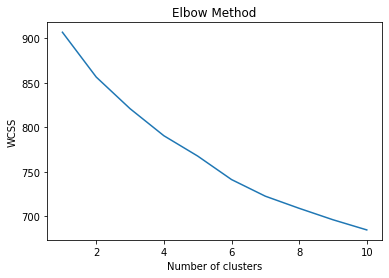

In [52]:
#Perform K-Means clustering to determine Clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Dendogram also suggests 6 visible clusters. lets see what data each cluster have and accordingly name the Theme

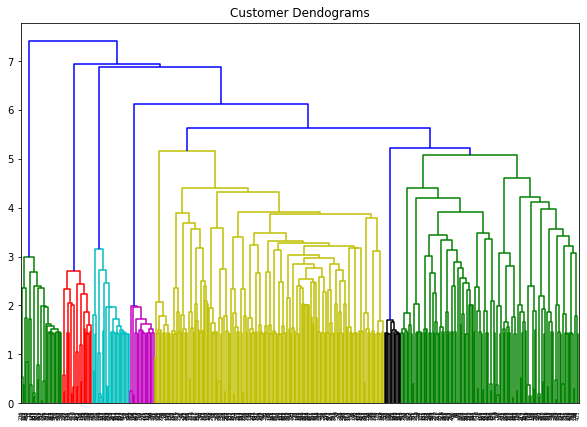

In [53]:
#It can be confirmed from Dendogram as well we have 6 clusters
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

##Summary and categorization

In [55]:
#Lets create Cluster and tag actor data
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
data['THEME'] = cluster.fit_predict(X)
data.groupby('THEME').mean()
#data.groupby(['THEME'])['START_YEAR'].agg([('Min' , 'min'), ('Max', 'max')])

,TOTAL_MOVIES,MOVIES_NOT_SCORED,RATING,BOX_OFFICE,REVIEW_SENTIMENT,MOVIES_PER_YEAR,START_YEAR,END_YEAR
THEME,,,,,,,,
0,11.753333,6.033333,36.414667,9.577217e+07,0.092467,0.747645,1986.733333,2003.813333
1,13.931034,6.655172,44.913448,1.137749e+08,0.101034,0.777677,1993.482759,2013.827586
2,21.813559,14.604520,62.762034,6.349293e+07,0.140056,0.757562,1960.564972,1989.225989
3,27.125000,12.875000,47.862500,2.426808e+08,0.112187,0.999057,1992.343750,2017.781250
4,20.684211,7.473684,48.612105,2.518396e+08,0.093158,0.863577,1992.368421,2018.000000
5,34.217391,14.173913,49.133043,6.496093e+08,0.112609,1.402976,1999.913043,2020.000000


**SUMMARY**
From the data, below are the observations about the data categories

**2 - Veteran** - Category 2 has actors between worked in movies roughly during 1960 - 1989. Average number of movies worked in are 21 but it can be observed that they were box office hits. This group certainly seems to be most expericed and have worked in movies with good review sentiment score and highest rating. They have acted in less number of movies per year (0.75 per year) given the generatiion they worked in. The number of releases in that decades were less compared to later decades of 20th century.

**5 - Superstars** - category 5 are superstarts because they have highest Box office collection and  average number of movies with good rating and  sentiment review score. They also get highest movies per year about 1.4 per year.

**0 - Flop** - they have worked in least number of movies with lowest rating and get less movies per year

**3- stars** - We have categorized them as stars because even though they have worked on less number of flims than superstar, their movie average ratings are good and they get almost 1 movie per year.
 
**4 - Average** - Category 4 is average because they have worked in good budget movies with decent rating and get about 0.86 movies per year

**1 - Below Average** - category 1 is below average as they worked in less number of movies with below average ratings

##Further improvements

1. Data scraping can be improved to scrap all the information for each actor. Features like genre, audience score, audience rating, user rating and many more can be used to create categories with stronger boundaries.

2. Prebuilt word embedding Neural network models viz. the Word2vec algorithm (https://code.google.com/
archive/p/word2vec), developed by Tomas Mikolov at Google in 2013 and Global Vectors for Word Representation (GloVe, https://nlp.stanford
.edu/projects/glove), which was developed by Stanford researchers in 2014 can be used to generate our own sentiment analysis model. Since Deep learning its a supervised, we need to have already classified data on sentiments.